Observed trend 1 : 
Tumor Volume (mm3) increase for all drugs except Capomulin and Ramicane. They are the only two among all to decrease Tumor Volume (mm3).Thus Capomulin and Ramicane should be the most efficient drugs to control the Tumor Volume (mm3). 

Observed trend 2 :
For growth rate of Metastatic Sites of Capomulin and Ramicane are the lowest of all. Thus Capomulin and Ramicane are 
most efficient drugs to control Metastatic spread.

Observed trend 3 :
Mouse survial rate drecrese dramatically for all drugs except Capomulin and Ramicane. They should be the most efficient drugs to save mouses' life.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [2]:
filename1 = 'data/clinicaltrial_data.csv'
clinicaltrial_data = pd.read_csv(filename1)
clinicaltrial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
filename2 = 'data/mouse_drug_data.csv'
mouse_drug_data = pd.read_csv(filename2)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
pm_df = pd.merge(clinicaltrial_data, mouse_drug_data, how = 'outer', on = 'Mouse ID')
pm_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

In [6]:
tumor_df = pd.pivot_table(pm_df, index = ['Timepoint'], values = 'Tumor Volume (mm3)', columns=['Drug'])
tumor_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
timepoint_list = [0,5,10,15,20,25,30,35,40,45]
Capomulin_list = tumor_df['Capomulin'].tolist()
Ceftamin_list = tumor_df['Ceftamin'].tolist()
Infubinol_list = tumor_df['Infubinol'].tolist()
Ketapril_list = tumor_df['Ketapril'].tolist()
Naftisol_list = tumor_df['Naftisol'].tolist()
Placebo_list = tumor_df['Placebo'].tolist()
Propriva_list = tumor_df['Propriva'].tolist()
Ramicane_list = tumor_df['Ramicane'].tolist()
Stelasyn_list = tumor_df['Stelasyn'].tolist()
Zoniferol_list = tumor_df['Zoniferol'].tolist()

In [8]:
Capomulin = plt.plot(timepoint_list, Capomulin_list, 'b--o', label='Capomulin')
Ceftamin = plt.plot(timepoint_list, Ceftamin_list, 'g--*', label='Ceftamin')
Infubinol = plt.plot(timepoint_list, Infubinol_list, 'r--X', label='Infubinol')
Ketapril = plt.plot(timepoint_list, Ketapril_list, 'c--+', label='Ketapril')
Naftisol = plt.plot(timepoint_list, Naftisol_list, 'm--v', label='Naftisol')
Placebo = plt.plot(timepoint_list, Placebo_list, 'y--^', label='Placebo')
Propriva = plt.plot(timepoint_list, Propriva_list, 'k--<', label='Propriva')
Ramicane = plt.plot(timepoint_list, Ramicane_list, 'k-->', label='Ramicane',alpha=0.5)
Stelasyn = plt.plot(timepoint_list, Stelasyn_list, 'b--.', label='Stelasyn',alpha=0.5)
Zoniferol = plt.plot(timepoint_list, Zoniferol_list, 'g--x',label='Zoniferol',alpha=0.5)

In [9]:
plt.title("Tumor Response To Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(20, 80)
plt.xlim(0, 45)
plt.grid(linestyle='--')
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Capomulin_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Ceftamin_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Infubinol_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Ketapril_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Naftisol_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Placebo_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Propriva_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Ramicane_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Stelasyn_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Zoniferol_list))
plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1))

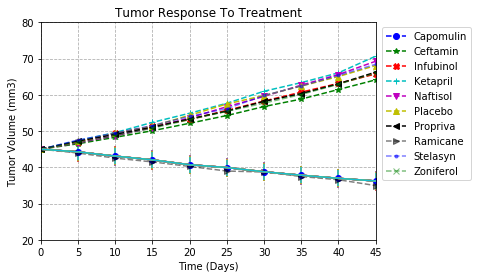

In [10]:
plt.show()

In [11]:
# Creating a scatter plot that shows how the number of metastatic 
# (cancer spreading) sites changes over time for each treatment.

In [12]:
metastatic_df = pd.pivot_table(pm_df, index = ['Timepoint'], values = 'Metastatic Sites', columns=['Drug'])
metastatic_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [13]:
timepoint_list = [0,5,10,15,20,25,30,35,40,45]
Capomulin_list = metastatic_df['Capomulin'].tolist()
Ceftamin_list = metastatic_df['Ceftamin'].tolist()
Infubinol_list = metastatic_df['Infubinol'].tolist()
Ketapril_list = metastatic_df['Ketapril'].tolist()
Naftisol_list = metastatic_df['Naftisol'].tolist()
Placebo_list = metastatic_df['Placebo'].tolist()
Propriva_list = metastatic_df['Propriva'].tolist()
Ramicane_list = metastatic_df['Ramicane'].tolist()
Stelasyn_list = metastatic_df['Stelasyn'].tolist()
Zoniferol_list = metastatic_df['Zoniferol'].tolist()

In [14]:
Capomulin = plt.plot(timepoint_list, Capomulin_list, 'b--o', label='Capomulin')
Ceftamin = plt.plot(timepoint_list, Ceftamin_list, 'g--*', label='Ceftamin')
Infubinol = plt.plot(timepoint_list, Infubinol_list, 'r--X', label='Infubinol')
Ketapril = plt.plot(timepoint_list, Ketapril_list, 'c--+', label='Ketapril')
Naftisol = plt.plot(timepoint_list, Naftisol_list, 'm--v', label='Naftisol')
Placebo = plt.plot(timepoint_list, Placebo_list, 'y--^', label='Placebo')
Propriva = plt.plot(timepoint_list, Propriva_list, 'k--<', label='Propriva')
Ramicane = plt.plot(timepoint_list, Ramicane_list, 'k-->', label='Ramicane',alpha=0.5)
Stelasyn = plt.plot(timepoint_list, Stelasyn_list, 'b--.', label='Stelasyn',alpha=0.5)
Zoniferol = plt.plot(timepoint_list, Zoniferol_list, 'g--x',label='Zoniferol',alpha=0.5)

In [15]:
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.ylim(0, 4)
plt.xlim(0, 45)
plt.grid(linestyle='--') 
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Capomulin_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Ceftamin_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Infubinol_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Ketapril_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Naftisol_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Placebo_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Propriva_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Ramicane_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Stelasyn_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Zoniferol_list))
plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1))

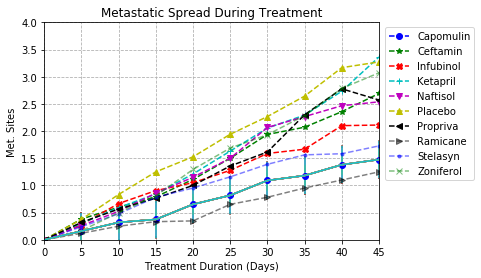

In [16]:
plt.show()

In [17]:
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [18]:
df = pm_df.groupby(['Drug','Timepoint']).count()
new_pm_df = df.drop(['Tumor Volume (mm3)', 'Metastatic Sites'], axis=1).rename(index=str,columns={'Mouse ID':'Mouse Count'})
new_pm_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [19]:
mouse0_df = pd.pivot_table(new_pm_df, index = ['Timepoint'], values = 'Mouse Count', columns=['Drug'])
mouse_df = mouse0_df.reindex(['0', '5', '10', '15', '20', '25', '30', '35', '40', '45'])
mouse_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [20]:
timepoint_list = [0,5,10,15,20,25,30,35,40,45]
Capomulin_list = mouse_df['Capomulin'].tolist()
Ceftamin_list = mouse_df['Ceftamin'].tolist()
Infubinol_list = mouse_df['Infubinol'].tolist()
Ketapril_list = mouse_df['Ketapril'].tolist()
Naftisol_list = mouse_df['Naftisol'].tolist()
Placebo_list = mouse_df['Placebo'].tolist()
Propriva_list = mouse_df['Propriva'].tolist()
Ramicane_list = mouse_df['Ramicane'].tolist()
Stelasyn_list = mouse_df['Stelasyn'].tolist()
Zoniferol_list = mouse_df['Zoniferol'].tolist()

In [21]:
Capomulin = plt.plot(timepoint_list, Capomulin_list, 'b--o', label='Capomulin')
Ceftamin = plt.plot(timepoint_list, Ceftamin_list, 'g--*', label='Ceftamin')
Infubinol = plt.plot(timepoint_list, Infubinol_list, 'r--X', label='Infubinol')
Ketapril = plt.plot(timepoint_list, Ketapril_list, 'c--+', label='Ketapril')
Naftisol = plt.plot(timepoint_list, Naftisol_list, 'm--v', label='Naftisol')
Placebo = plt.plot(timepoint_list, Placebo_list, 'y--^', label='Placebo')
Propriva = plt.plot(timepoint_list, Propriva_list, 'k--<', label='Propriva')
Ramicane = plt.plot(timepoint_list, Ramicane_list, 'k-->', label='Ramicane',alpha=0.5)
Stelasyn = plt.plot(timepoint_list, Stelasyn_list, 'b--.', label='Stelasyn',alpha=0.5)
Zoniferol = plt.plot(timepoint_list, Zoniferol_list, 'g--x',label='Zoniferol',alpha=0.5)

In [22]:
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.ylim(5, 30)
plt.xlim(0, 45)
plt.grid(linestyle='--')
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Capomulin_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Ceftamin_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Infubinol_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Ketapril_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Naftisol_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Placebo_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Propriva_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Ramicane_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Stelasyn_list))
plt.errorbar(timepoint_list, Capomulin_list, xerr=0, yerr=stats.sem(Zoniferol_list))
plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1))

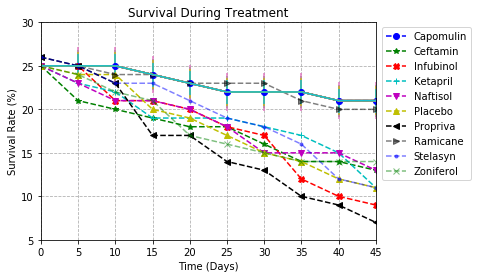

In [23]:
plt.show()

In [24]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [25]:
tumor_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [26]:
tvc = (tumor_df.loc[45] - tumor_df.loc[0]) / tumor_df.loc[0]
tvc

Drug
Capomulin   -0.194753
Ceftamin     0.425165
Infubinol    0.461235
Ketapril     0.570288
Naftisol     0.539233
Placebo      0.512980
Propriva     0.472412
Ramicane    -0.223209
Stelasyn     0.520851
Zoniferol    0.465798
dtype: float64

In [27]:
tumor_chart = tvc.plot(kind="bar", title="Tumor Change Over 45 Day Treatment", color='rggggggrgg')
tumor_chart.set_xlabel("Drug")
tumor_chart.set_ylabel("% Tumor Volume Change")
plt.grid(linestyle='--') 

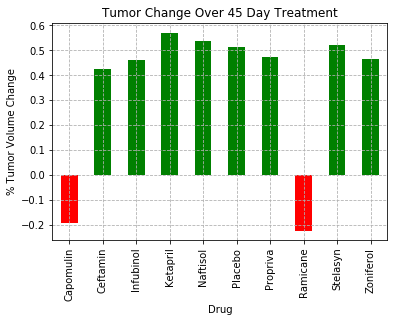

In [28]:
plt.show() 